In [1]:
from utils import *

In [2]:
forecast = pd.read_csv("data/prophet_5yr_forecast_optuna.csv")
# forecast = forecast[forecast['ds'] >= '2024-06-01']
forecast = forecast[forecast['ds'] >= '2024-06-03']

forecast["timestamp"] = forecast["ds"]

cutoff_ts = forecast['ds'].min()

forecast

Unnamed: 0                   ds       trend   yhat_lower   yhat_upper  \
73824        73824  2024-06-03 00:00:00  176.517327   -41.733489   208.430064   
73825        73825  2024-06-03 01:00:00  176.514424   -45.674003   204.453934   
73826        73826  2024-06-03 02:00:00  176.511522   -40.275264   182.550285   
73827        73827  2024-06-03 03:00:00  176.508619   -39.813925   172.357283   
73828        73828  2024-06-03 04:00:00  176.505717   -47.039050   188.587101   
...            ...                  ...         ...          ...          ...   
108043      108043  2028-04-28 19:00:00   77.196713 -2722.677677  2512.788727   
108044      108044  2028-04-28 20:00:00   77.193811 -2597.611475  2422.341923   
108045      108045  2028-04-28 21:00:00   77.190908 -2288.286487  2110.320598   
108046      108046  2028-04-28 22:00:00   77.188006 -1971.299162  1833.089253   
108047      108047  2028-04-28 23:00:00   77.185103 -1767.722983  1662.985993   

        trend_lower  trend_upper     daily  daily_lower  daily_upper  ...  \
73824    -83.201648   397.707044 -0.097116    -0.097116    -0.097116  ...   
73825    -83.244964   397.711845 -0.136434    -0.136434    -0.136434  ...   
73826    -83.288281   397.716647 -0.186929    -0.186929    -0.186929  ...   
73827    -83.331597   397.721448 -0.223473    -0.223473    -0.223473  ...   
73828    -83.374913   397.726250 -0.203346    -0.203346    -0.203346  ...   
...             ...          ...       ...          ...          ...  ...   
108043 -2596.661858  2390.349838  0.282364     0.282364     0.282364  ...   
108044 -2596.749363  2390.423352  0.232678     0.232678     0.232678  ...   
108045 -2596.836869  2390.496866  0.124711     0.124711     0.124711  ...   
108046 -2596.924375  2390.570379  0.015933     0.015933     0.015933  ...   
108047 -2597.011881  2390.643893 -0.056168    -0.056168    -0.056168  ...   

        weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
73824      -0.108406     -0.108406 -0.310599     -0.310599     -0.310599   
73825      -0.094375     -0.094375 -0.309845     -0.309845     -0.309845   
73826      -0.080243     -0.080243 -0.309086     -0.309086     -0.309086   
73827      -0.066089     -0.066089 -0.308322     -0.308322     -0.308322   
73828      -0.051990     -0.051990 -0.307555     -0.307555     -0.307555   
...              ...           ...       ...           ...           ...   
108043     -0.004595     -0.004595 -0.228791     -0.228791     -0.228791   
108044     -0.010174     -0.010174 -0.228029     -0.228029     -0.228029   
108045     -0.016180     -0.016180 -0.227268     -0.227268     -0.227268   
108046     -0.022616     -0.022616 -0.226507     -0.226507     -0.226507   
108047     -0.029486     -0.029486 -0.225746     -0.225746     -0.225746   

        additive_terms  additive_terms_lower  additive_terms_upper       yhat  \
73824              0.0                   0.0                   0.0  85.412965   
73825              0.0                   0.0                   0.0  81.081110   
73826              0.0                   0.0                   0.0  74.795336   
73827              0.0                   0.0                   0.0  70.976829   
73828              0.0                   0.0                   0.0  77.152186   
...                ...                   ...                   ...        ...   
108043             0.0                   0.0                   0.0  80.977710   
108044             0.0                   0.0                   0.0  76.767283   
108045             0.0                   0.0                   0.0  68.025544   
108046             0.0                   0.0                   0.0  59.188551   
108047             0.0                   0.0                   0.0  53.149641   

                  timestamp  
73824   2024-06-03 00:00:00  
73825   2024-06-03 01:00:00  
73826   2024-06-03 02:00:00  
73827   2024-06-03 03:00:00  
73828   2024-06-03 04:00:00  
...                     ...  
108043  2028-0

In [3]:
# Fetch forwards data for the same date range as the forecast
forwards = get_forwards(
    timestamp=cutoff_ts,
    start=forecast["timestamp"].min(),
    end=forecast["timestamp"].max()
)

forwards

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:38: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo

Identifier                  TimeStamp                      Begin  \
10765          M  2024-06-03 00:00:00+02:00  2024-07-01 00:00:00+02:00   
10766          M  2024-06-03 00:00:00+02:00  2024-08-01 00:00:00+02:00   
10767          M  2024-06-03 00:00:00+02:00  2024-09-01 00:00:00+02:00   
10768          M  2024-06-03 00:00:00+02:00  2024-10-01 00:00:00+02:00   
10769          M  2024-06-03 00:00:00+02:00  2024-11-01 00:00:00+01:00   
10770          M  2024-06-03 00:00:00+02:00  2024-12-01 00:00:00+01:00   
45961          Y  2024-06-03 00:00:00+02:00  2025-01-01 00:00:00+01:00   
10771          M  2024-06-03 00:00:00+02:00  2025-01-01 00:00:00+01:00   
10772          M  2024-06-03 00:00:00+02:00  2025-02-01 00:00:00+01:00   
10773          M  2024-06-03 00:00:00+02:00  2025-03-01 00:00:00+01:00   
45962          Y  2024-06-03 00:00:00+02:00  2026-01-01 00:00:00+01:00   
45963          Y  2024-06-03 00:00:00+02:00  2027-01-01 00:00:00+01:00   

                             End    Open    High     Low   Close  Settlement  
10765  2024-08-01 00:00:00+02:00   85.00   89.45   83.00   84.15       83.86  
10766  2024-09-01 00:00:00+02:00   85.94   92.30   85.14   87.00       86.78  
10767  2024-10-01 00:00:00+02:00   92.70   98.20   92.50   93.50       93.02  
10768  2024-11-01 00:00:00+01:00   95.75   98.25   93.50   93.50       93.07  
10769  2024-12-01 00:00:00+01:00  108.00  108.00  108.00  108.00      107.40  
10770  2025-01-01 00:00:00+01:00  110.00  110.00  110.00  110.00      107.79  
45961  2026-01-01 00:00:00+01:00  101.00  102.80   98.34   98.75       98.88  
10771  2025-02-01 00:00:00+01:00  122.00  122.00  122.00  122.00      119.90  
10772  2025-03-01 00:00:00+01:00     NaN     NaN     NaN     NaN      118.43  
10773  2025-04-01 00:00:00+02:00     NaN     NaN     NaN     NaN       94.82  
45962  2027-01-01 00:00:00+01:00   86.01   87.75   85.35   86.00       85.93  
45963  2028-01-01 00:00:00+01:00   76.00   76.50   74.50   75.00       74.73

In [4]:
t, F = partition_forwards(forwards, pd.to_datetime(cutoff_ts, utc=True)-pd.Timedelta(1, 'h'))

In [5]:
# Construct matrices
H = construct_H(t)

In [6]:
s_t = np.array(forecast["yhat"])
A, b = construct_A_and_b(t, F, s_t)

A.shape, b.shape

671 1415
1415 2159
2159 2879
2879 3624
3624 4344
4344 5088
5088 13848
5088 5832
5832 6504
6504 7247
13848 22608
22608 31368


((46, 60), (46,))

In [7]:
n = len(t)-1
m = len(F)

3*(n-1)+1+m

46

In [8]:
# Solve the system
x, lam = solve_linear_system(H, A, b)

# Results
print("Solution x:", x)
print("Lagrange multipliers λ:", lam)

Solution x: [ 5.35665735e-11 -1.43772683e-07  1.44707206e-04 -3.06402494e-01
  9.60001155e+01 -1.22087140e-10  8.50427335e-07 -1.96548233e-03
  1.68420964e+00 -6.08178926e+02  7.93783833e-11 -8.89428923e-07
  3.66904216e-03 -6.42574928e+00  3.76917140e+03 -3.98238521e-11
  4.83304019e-07 -2.25910505e-03  4.95234127e+00 -4.42020927e+03
  1.34769843e-10 -2.04760619e-06  1.14989228e-02 -2.82870541e+01
  2.56946830e+04 -1.99867943e-10  3.76705998e-06 -2.63894420e-02
  8.14376503e+01 -9.34663461e+04  1.42379973e-10 -3.19836960e-06
  2.67707166e-02 -9.88816076e+01  1.35899750e+05 -4.08080555e-11
  1.07504073e-06 -1.06130769e-02  4.64665818e+01 -7.60179101e+04
 -5.24866684e-12  1.49927673e-07 -1.58767395e-03  7.33243444e+00
 -1.23857866e+04  9.23616420e-14 -4.89806064e-09  9.53591913e-05
 -7.98859650e-01  2.34608550e+03 -7.71812947e-15  6.45558061e-10
 -1.97928564e-05  2.64224054e-01 -1.33431028e+03  1.49565705e-15
 -1.87663081e-10  8.46333897e-06 -1.61653322e-01  1.07274865e+03]
Lagrange mul

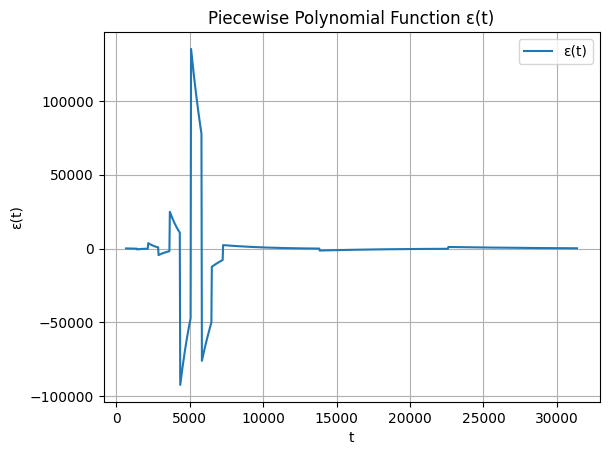

In [9]:
# Construct ε(t)
epsilon = construct_epsilon(x, t)

# Plot ε(t)
t_plot = np.linspace(t[0], t[-1], 1000)
plt.plot(t_plot, epsilon(t_plot), label="ε(t)")
plt.xlabel("t")
plt.ylabel("ε(t)")
plt.title("Piecewise Polynomial Function ε(t)")
plt.legend()
plt.grid()
plt.show()

<Axes: >

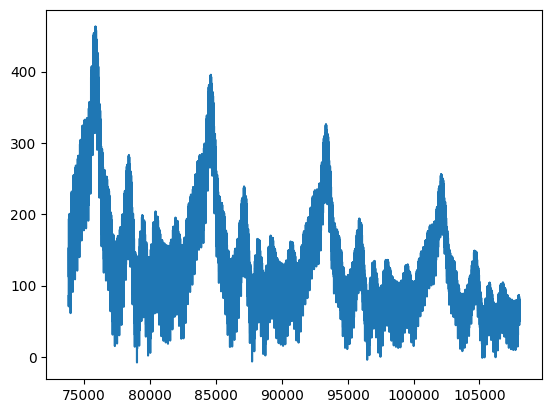

In [10]:
corrected_forecast = forecast.copy()
corrected_forecast["yhat"].plot()

<Axes: >

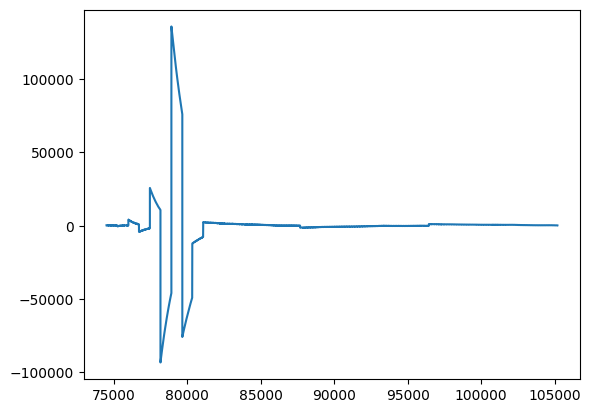

In [11]:
eps = np.array([epsilon(idx) for idx, _ in enumerate(corrected_forecast["timestamp"])])
corrected_forecast["yhat"] = corrected_forecast["yhat"] + eps
corrected_forecast["yhat"].plot()

In [12]:
fig = plot_forecast_forwards(cutoff_ts, corrected_forecast)

# Plot the initial forecast as a grey line if provided
fig.add_trace(go.Scatter(
    x=forecast['timestamp'],
    y=forecast['yhat'],
    mode='lines',
    name='Initial Forecast',
    line=dict(color='grey', dash='dot')
))
fig.show()

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:38: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo